In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 2.1MB 10.5MB/s 
     |████████████████████████████████| 9.5MB 30.7MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, r2_score

# ***Taking Entire Dataset***

In [ ]:
#Reading dataset
DF = pd.read_csv("/content/drive/MyDrive/Nifty50.csv")

In [ ]:
DF

,time,currentVal
0,1546314300,10874.150391
1,1546314360,10875.750000
2,1546314420,10875.549805
3,1546314480,10865.049805
4,1546314540,10844.650391
...,...,...
206929,1616666220,14329.750000
206930,1616666280,14332.099609
206931,1616666340,14348.250000
206932,1616666400,14342.200195


In [ ]:
#Just for visualization purpose
DF['time'] = pd.to_datetime(DF['time'], unit = 's')

In [ ]:
DF

,time,currentVal
0,2019-01-01 03:45:00,10874.150391
1,2019-01-01 03:46:00,10875.750000
2,2019-01-01 03:47:00,10875.549805
3,2019-01-01 03:48:00,10865.049805
4,2019-01-01 03:49:00,10844.650391
...,...,...
206929,2021-03-25 09:57:00,14329.750000
206930,2021-03-25 09:58:00,14332.099609
206931,2021-03-25 09:59:00,14348.250000
206932,2021-03-25 10:00:00,14342.200195


In [ ]:
#Taking time column and index column as it is time series data
DF.set_index('time', inplace = True)

In [ ]:
DF

,currentVal
time,
2019-01-01 03:45:00,10874.150391
2019-01-01 03:46:00,10875.750000
2019-01-01 03:47:00,10875.549805
2019-01-01 03:48:00,10865.049805
2019-01-01 03:49:00,10844.650391
...,...
2021-03-25 09:57:00,14329.750000
2021-03-25 09:58:00,14332.099609
2021-03-25 09:59:00,14348.250000


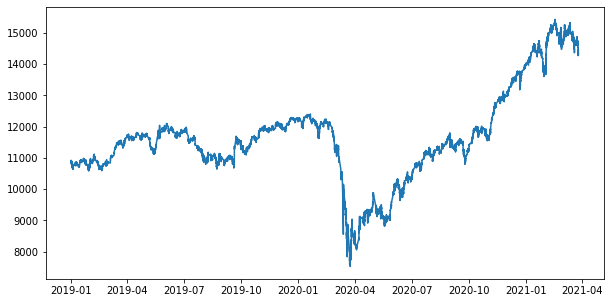

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(DF)

In [ ]:
#Converting DataFrame to array
X = DF.values

In [ ]:
#Splitting train and test data into 95 - 5 ratio
train = X[0:196588]
test = X[196587:]
predictions = []

In [ ]:
test.size

10347

In [ ]:
#Using Auto ARIMA to get best possible combination of p d q parameter values
#Taking maximum value of p and q as 5
arima_model = auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, stepwise=True, trace=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1359166.335, Time=3.95 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1359166.214, Time=4.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1359166.132, Time=9.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1359165.924, Time=2.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1359147.995, Time=24.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1359098.949, Time=82.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1359100.132, Time=7.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1359098.343, Time=16.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1359096.324, Time=8.83 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1359093.407, Time=18.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1359043.397, Time=23.39 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1359045.452, Time=26.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1359095.347, Time=20.75 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1359043.004

In [ ]:
#Increaing maximum value of p and q to 7
arima_model = auto_arima(train, start_p=0, start_q=0, max_p=7, max_q=7, stepwise=True, trace=True, random_state=20, n_fits=50)

#NOTE : After some time this cell stops executing as our dataset is quite big and hence RAM is getting chocked

#Best possible combination which Auto ARIMA gave is (p,d,q) = (6,1,0)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1359166.335, Time=4.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1359166.214, Time=5.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1359166.132, Time=10.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1359165.924, Time=2.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1359147.995, Time=24.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1359098.949, Time=82.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1359100.132, Time=7.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1359098.343, Time=16.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1359096.324, Time=8.82 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1359093.407, Time=18.40 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1359043.397, Time=23.22 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1359040.861, Time=29.27 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=1359042.022, Time=31.29 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=1359042.86

In [ ]:
#Taking (p,d,q) = (6,1,0)
model_arima = ARIMA(train,order=(6, 1, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1359040.8582447008


In [ ]:
predictions = model_arima_fit.forecast(steps=10347)[0]
predictions

array([15162.79788088, 15162.70492454, 15162.44797591, ...,
       15388.29698557, 15388.31879607, 15388.34060658])

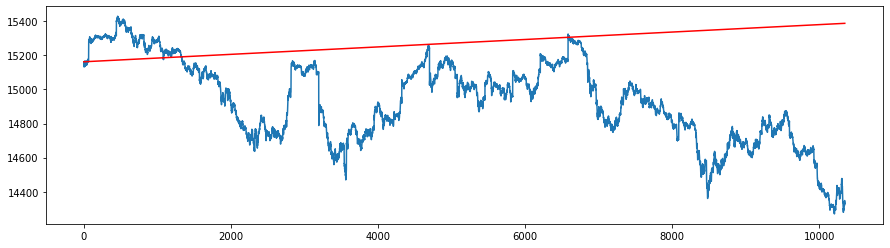

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
print("Mean Squared Error: ", mean_squared_error(test, predictions))
print("R2 Score: ", r2_score(test, predictions))

Mean Squared Error:  202065.88739874001
R2 Score:  -2.380894373411513


In [ ]:
#Taking (p,d,q) = (0,1,8)

#After manual trial and error method this is the best possible combination achieved

model_arima = ARIMA(train,order=(0, 1, 8))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1358769.5111008363


In [ ]:
predictions = model_arima_fit.forecast(steps=10347)[0]
predictions

array([15163.120437  , 15162.86665254, 15162.55775186, ...,
       15387.19688963, 15387.21870366, 15387.24051768])

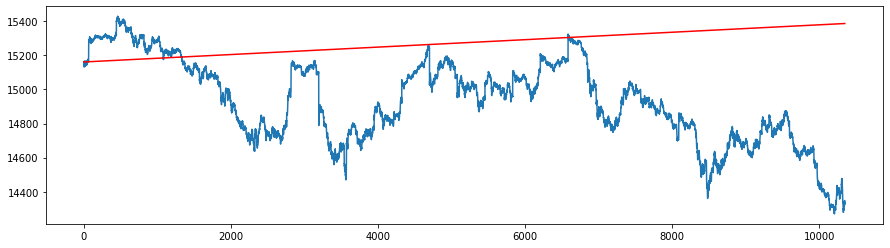

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
print("Mean Squared Error: ", mean_squared_error(test, predictions))
print("R2 Score: ", r2_score(test, predictions))

Mean Squared Error:  201302.6090689985
R2 Score:  -2.3681234725752045


# ***Taking Specific Time Frame***

In [ ]:
DF = pd.read_csv("/content/drive/MyDrive/Nifty50.csv")
DF['time'] = pd.to_datetime(DF['time'], unit = 's')

In [ ]:
DF

,time,currentVal
0,2019-01-01 03:45:00,10874.150391
1,2019-01-01 03:46:00,10875.750000
2,2019-01-01 03:47:00,10875.549805
3,2019-01-01 03:48:00,10865.049805
4,2019-01-01 03:49:00,10844.650391
...,...,...
206929,2021-03-25 09:57:00,14329.750000
206930,2021-03-25 09:58:00,14332.099609
206931,2021-03-25 09:59:00,14348.250000
206932,2021-03-25 10:00:00,14342.200195


In [ ]:
#Taking only 1 year data (01-01-2019 to 31-12-2019) for experimental purpose. Wanted to see how ARIMA performs in this case

#Reason to take this period was that after this period lockdown started and hence there was a big dip in graph
#Hence we took pre covid time period as it was some sort of stationary data

TestDF = DF[0:91498]

In [ ]:
TestDF

,time,currentVal
0,2019-01-01 03:45:00,10874.150391
1,2019-01-01 03:46:00,10875.750000
2,2019-01-01 03:47:00,10875.549805
3,2019-01-01 03:48:00,10865.049805
4,2019-01-01 03:49:00,10844.650391
...,...,...
91493,2019-12-31 09:55:00,12178.549805
91494,2019-12-31 09:56:00,12174.650391
91495,2019-12-31 09:57:00,12173.700195
91496,2019-12-31 09:58:00,12172.349609


In [ ]:
TestDF.set_index('time', inplace = True)

In [ ]:
TestDF

,currentVal
time,
2019-01-01 03:45:00,10874.150391
2019-01-01 03:46:00,10875.750000
2019-01-01 03:47:00,10875.549805
2019-01-01 03:48:00,10865.049805
2019-01-01 03:49:00,10844.650391
...,...
2019-12-31 09:55:00,12178.549805
2019-12-31 09:56:00,12174.650391
2019-12-31 09:57:00,12173.700195


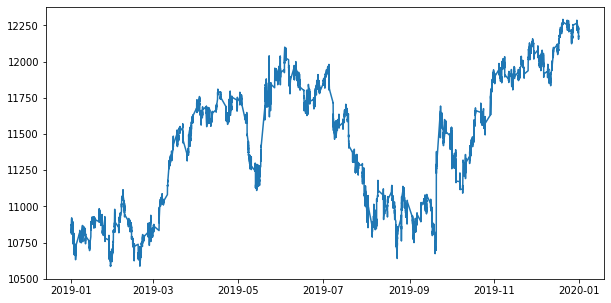

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(TestDF)

In [ ]:
X = TestDF.values

In [ ]:
train = X[0:82348]
test = X[82347:91498]
predictions = []

In [ ]:
test.size

9151

In [ ]:
#Using Auto ARIMA to get best possible combination of p d q parameter values
#Taking maximum value of p and q as 5
arima_model = auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, stepwise=True, trace=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=492345.656, Time=1.87 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=492345.986, Time=2.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=492345.934, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=492344.420, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=492343.549, Time=11.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=492329.585, Time=9.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=492327.574, Time=3.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=492329.533, Time=4.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=492331.537, Time=7.74 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=492326.369, Time=1.71 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=492344.757, Time=1.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=492328.329, Time=2.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=492328.382, Time=3.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=492341.038, Time=9.60 sec
 ARI

In [ ]:
#Increasing maximum value of p and q parameters to 7
arima_model = auto_arima(train, start_p=0, start_q=0, max_p=7, max_q=7, stepwise=True, trace=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=492345.656, Time=1.78 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=492345.986, Time=2.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=492345.934, Time=4.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=492344.420, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=492343.549, Time=11.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=492329.585, Time=9.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=492327.574, Time=3.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=492329.533, Time=5.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=492331.537, Time=7.67 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=492326.369, Time=1.68 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=492344.757, Time=1.00 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=492328.329, Time=2.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=492328.382, Time=3.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=492341.038, Time=9.51 sec
 ARI

In [ ]:
#Increasing maximum value of p and q parameters to 10
arima_model = auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, stepwise=True, trace=True, random_state=20, n_fits=50)

#NOTE : Even after increasing maximum value of p and q parameters to 10 we were getting same best model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=492345.656, Time=1.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=492345.986, Time=2.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=492345.934, Time=4.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=492344.420, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=492343.549, Time=11.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=492329.585, Time=9.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=492327.574, Time=3.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=492329.533, Time=3.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=492331.537, Time=7.72 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=492326.369, Time=1.68 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=492344.757, Time=1.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=492328.329, Time=2.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=492328.382, Time=3.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=492341.038, Time=9.51 sec
 ARI

In [ ]:
#Taking (p,d,q) = (2,1,0)
model_arima = ARIMA(train,order=(2, 1, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


492327.5736421696


In [ ]:
predictions = model_arima_fit.forecast(steps=9151)[0]
predictions

array([12080.50606629, 12080.49635851, 12080.51046983, ...,
       12214.48945487, 12214.50410374, 12214.51875262])

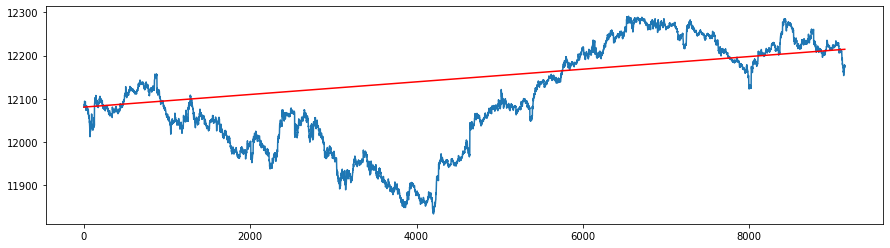

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
print("Mean Squared Error: ", mean_squared_error(test, predictions))
print("R2 Score: ", r2_score(test, predictions))

Mean Squared Error:  12582.88079592617
R2 Score:  0.1393070596421997
